# Final document with all the plots

In [8]:
import dt 
import cnn 
import nn 
from load_data import load_data
import warnings

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

#Decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris



In [9]:
warnings.filterwarnings('ignore')

# Load the data

In [10]:
X_train, y_train, X_test, y_test = load_data()

# Exploratory data analysis

In [11]:
savefigs = False
if savefigs:
    if not os.path.isdir('figs'):
        os.makedirs('figs')


if savefigs: plt.savefig('../figs/DegreeDistribution.png', bbox_inches = 'tight')

#### Setting theme for plotting and global variables

In [12]:
sns.set_theme(style='whitegrid', palette="flare")
NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

#### Numerical variables

In [6]:
#shape of the data
print(f'Shape of the training data: {X_train.shape}')
print(f'Shape of the testing data: {X_test.shape}')

#mean, std, min, max
print(f'\nMean of the training data: {X_train.mean()}')
print(f'Standard Deviation of the training data: {X_train.std()}')

print(f'\nMin of the training data: {X_train.min()}')
print(f'Max of the training data: {X_train.max()}')

Shape of the training data: (10000, 784)
Shape of the testing data: (5000, 784)

Mean of the training data: 77.02673711734694
Standard Deviation of the training data: 89.9969501937854

Min of the training data: 0
Max of the training data: 255


#### What is the distribution of the target variable?

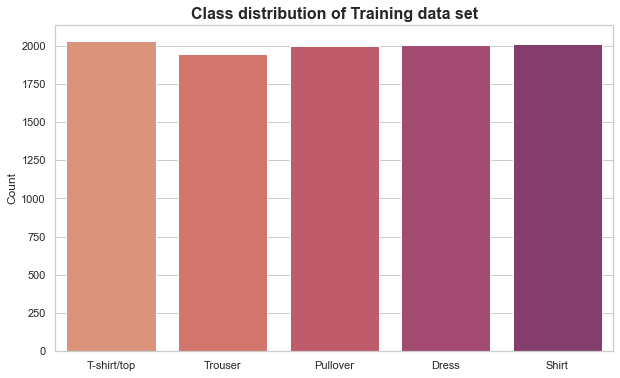

In [5]:

def plot_y_distribution(y, t):
    ''' Plot the distribution of the labels '''
    classes, classes_counts = np.unique(y, return_counts=True)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=classes, y=classes_counts, ax=ax);
    ax.set_title(f'Class distribution of {t}', fontsize=16, fontweight='bold');
    ax.set_ylabel('Count');
    ax.set_xticklabels(NAMES);



plot_y_distribution(y_train, "Training data set")
#if savefigs: plt.savefig('figs/distributiontrainingdataset.png', bbox_inches = 'tight')

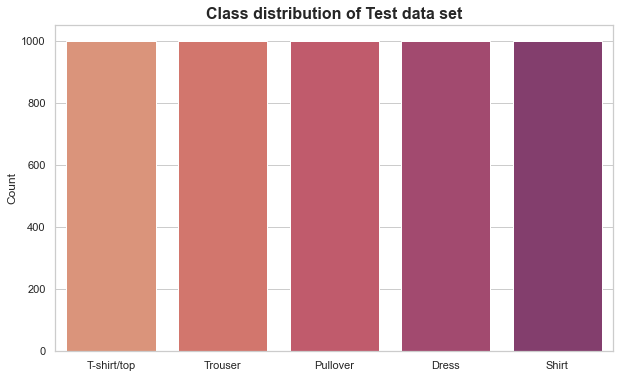

In [6]:
plot_y_distribution(y_test, "Test data set")
#if savefigs: plt.savefig('figs/distributiontestdataset.png', bbox_inches = 'tight')

#### What are the properties of images in the dataset?
We investigate mean, median, and stdev of the pixel values in the images.

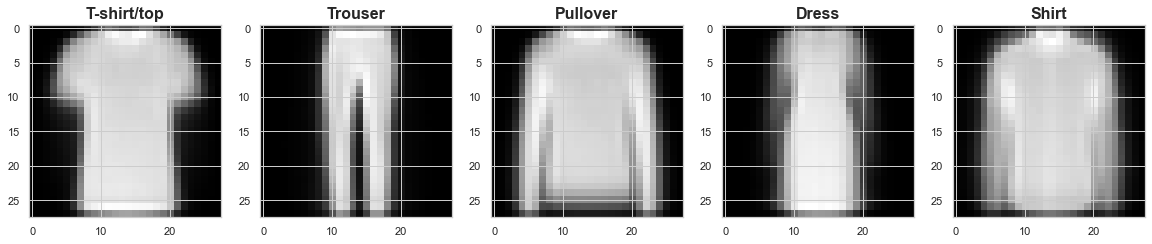

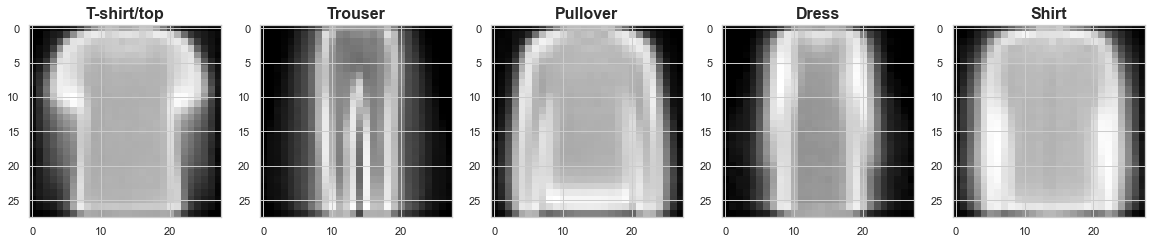

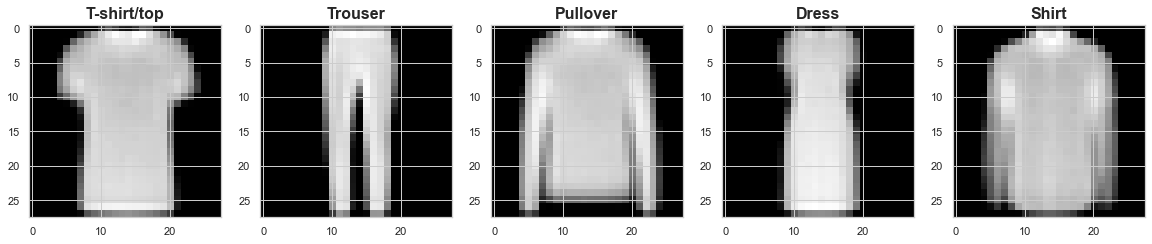

In [7]:
def plot_images(X, y, measure='mean'):
    ''' Plot the mean, median, or std of the images'''
    classes = np.unique(y)
    fig, ax = plt.subplots(1, len(classes), figsize=(20, 8))
    for c in classes:
        imgs = X[y == c]

        if measure == 'mean': av_img = np.mean(imgs, axis=0).reshape(28, 28)
        elif measure == 'median': av_img = np.median(imgs, axis=0).reshape(28, 28)
        elif measure == 'std': av_img = np.std(imgs, axis=0).reshape(28, 28)

        ax[c].imshow(av_img, cmap='gray')
        ax[c].set_title(NAMES[c], fontsize=16, fontweight='bold')


plot_images(X_train, y_train)
#if savefigs: plt.savefig('figs/mean.png', bbox_inches = 'tight')
plot_images(X_train, y_train, measure='std')
#if savefigs: plt.savefig('figs/std.png', bbox_inches = 'tight')
plot_images(X_train, y_train, measure='median')
#if savefigs: plt.savefig('figs/median.png', bbox_inches = 'tight')

We also investigate the distribution of the pixel values in the images. As an input, we use the mean of the pixel values in the images.

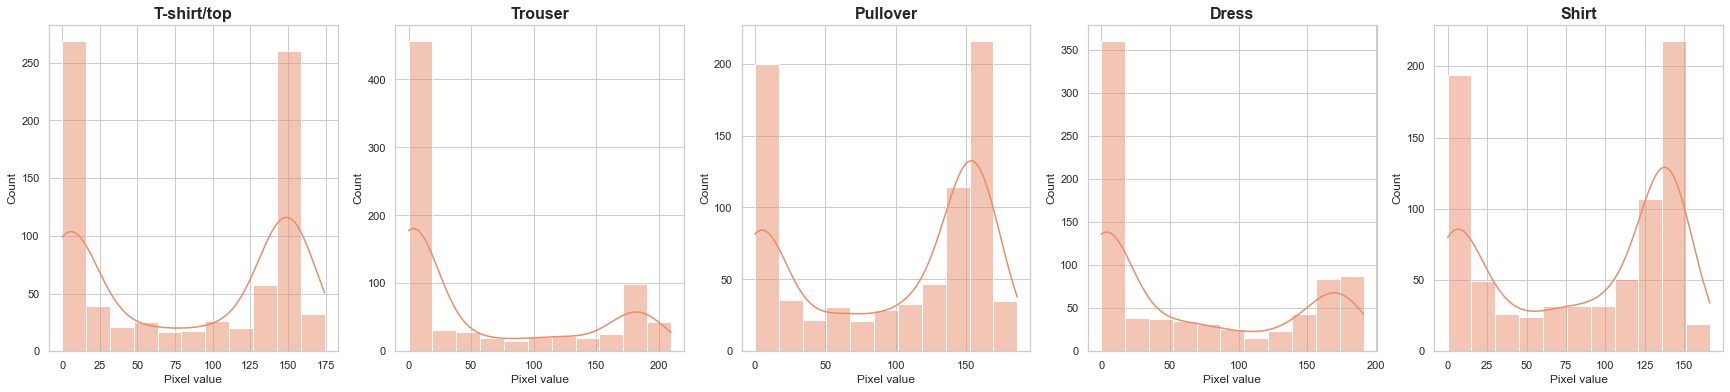

In [8]:
def plot_color_distribution(X, y):
    ''' Plot the distribution of the colors '''
    classes = np.unique(y)
    av_imgs = np.zeros((len(classes), 28, 28))
    for c in classes:
        imgs = X[y == c]
        av_imgs[c] = np.mean(imgs, axis=0).reshape(28, 28)

    #plot the distribution of the average image
    fig, ax = plt.subplots(1, len(classes), figsize=(30, 6))
    for c in classes:
        sns.histplot(av_imgs[c].flatten(), ax=ax[c], kde=True)
        ax[c].set_title(NAMES[c], fontsize=16, fontweight='bold')
        ax[c].set_xlabel('Pixel value')
        ax[c].set_ylabel('Count')

plot_color_distribution(X_train, y_train)
#if savefigs: plt.savefig('figs/colordistribution.png', bbox_inches = 'tight')

# Neural Network

In [7]:
def make_plots(data, labels, activationfunction):
    fig, axes = plt.subplots(1,2, figsize = (20, 5))
    for i, label in enumerate(labels):
        colors_taratt = ['#761878', '#826fc9', '#b1c2f0' ]
        sns.lineplot(x = 'epoch', y = label, palette = colors_taratt, data = data, ax = axes.flat[i]);
        axes.flat[i].set_title(f' History of {label} with {activationfunction}', size = 13)
        axes.flat[i].set(ylabel= f'{label}', xlabel = 'Number of epochs');
        axes.flat[i].set_ylim(0,1)

In [25]:
LEARNING_RATE = 0.01
EPOCHS = 100
BATCH_SIZE = 64
BATCH_NUM = 5

nn_leakyrelu = nn.NeuralNetwork(test=True, activation_name='leaky_relu', learning_rate=LEARNING_RATE, batch_size=BATCH_SIZE)
df_leakyrelu = nn_leakyrelu.TRAIN(X_train, y_train, epochs=EPOCHS, batch_num=BATCH_NUM, testing=True)
nn_leakyrelu.TEST(X_test, y_test)
make_plots(df_leakyrelu, ['accuracy', 'loss'], 'leaky_relu')
if savefigs: plt.savefig('figs/nn_leakyrelu.png', bbox_inches = 'tight')

Epoch 0, loss: 0.15625, accuracy: 0.21875
Epoch 20, loss: 0.071875, accuracy: 0.640625


Epoch 0, loss: 0.16875, accuracy: 0.15625
Epoch 20, loss: 0.109375, accuracy: 0.453125
Epoch 40, loss: 0.08125, accuracy: 0.59375
Epoch 60, loss: 0.0671875, accuracy: 0.6640625
Epoch 80, loss: 0.0578125, accuracy: 0.7109375
Epoch 99, loss: 0.0828125, accuracy: 0.5859375
loss: 0.08052, accuracy: 0.5974


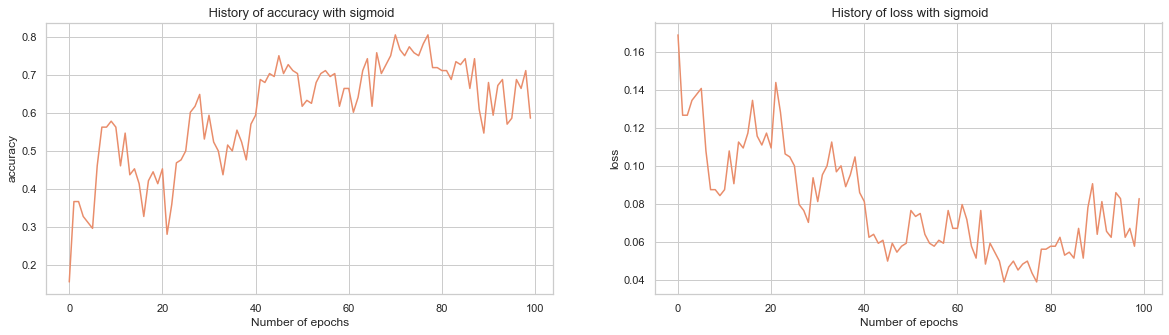

In [19]:
LEARNING_RATE = 0.01
EPOCHS = 100
BATCH_SIZE = 128
BATCH_NUM = 5

nn_sigmoid= nn.NeuralNetwork(test=True, activation_name='sigmoid', learning_rate=LEARNING_RATE, batch_size=BATCH_SIZE)
df_sigmoid = nn_sigmoid.TRAIN(X_train, y_train, epochs=EPOCHS, batch_num=BATCH_NUM, testing=True)
nn_sigmoid.TEST(X_test, y_test)
make_plots(df_sigmoid,['accuracy', 'loss'], 'sigmoid' )
if savefigs: plt.savefig('figs/nn_sigmoid.png', bbox_inches='tight')

# Decision Tree

In [38]:
x = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=3)
pcax = pca.fit_transform(x)
df = pd.DataFrame(data = pcax, columns= ['pc 1', 'pc 2', 'pc 3'])
df = pd.concat([df, pd.DataFrame(y_train, columns = ['y'])], axis = 1)

x_t = StandardScaler().fit_transform(X_test)
pca = PCA(n_components=3)
pcax = pca.fit_transform(x_t)
df_t = pd.DataFrame(data = pcax, columns= ['pc 1', 'pc 2', 'pc 3'])
df_t = pd.concat([df_t, pd.DataFrame(y_test, columns = ['y'])], axis = 1)

#### PCA for Decision Tree

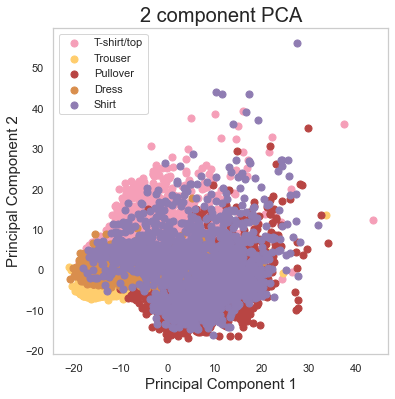

In [16]:
colours = ['#F59FB8', '#FFCD6D', '#B84543', '#D98E4D', '#8F7CB2']
fig, ax = plt.subplots(figsize = (6,6)) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4]
for target, color in zip(targets,colours):
    indicesToKeep = df['y'] == target
    ax.scatter(df.loc[indicesToKeep, 'pc 2']
               , df.loc[indicesToKeep, 'pc 3']
               , c = color
               , s = 50)
ax.legend(NAMES);
ax.grid();

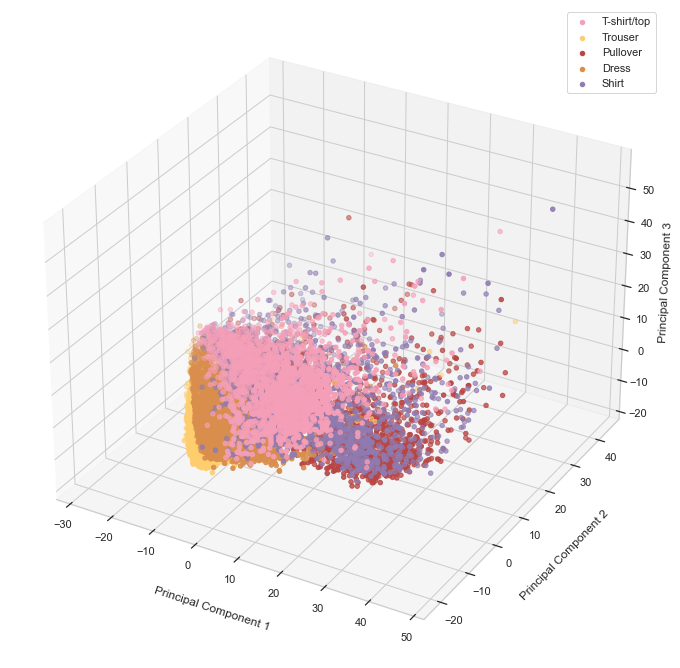

In [17]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

for target, color in zip(targets,colours):
    indicesToKeep = df['y'] == target
    ax.scatter(df.loc[indicesToKeep, 'pc 1'], 
                df.loc[indicesToKeep, 'pc 2'],
                df.loc[indicesToKeep, 'pc 3'],
                c = color)

ax.set_xlabel('Principal Component 1', labelpad=15);
ax.set_ylabel('Principal Component 2', labelpad = 15);
ax.set_zlabel('Principal Component 3');
plt.subplots_adjust(right = 0.2)
ax.legend(NAMES);
plt.tight_layout();

if savefigs:plt.savefig('figs/pca.png', bbox_inches = 'tight')

In [39]:
X_train = df.iloc[:, :-1].values
Y_train= df.iloc[:, -1].values.reshape(-1,1)

X_test = df_t.iloc[:, :-1].values
Y_test = df_t.iloc[:, -1].values.reshape(-1,1)

In [40]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=6)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [41]:
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred, target_names=NAMES))

0.6048
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.69      0.72      1000
     Trouser       0.92      0.46      0.61      1000
    Pullover       0.60      0.83      0.70      1000
       Dress       0.51      0.85      0.64      1000
       Shirt       0.38      0.21      0.27      1000

    accuracy                           0.60      5000
   macro avg       0.63      0.60      0.59      5000
weighted avg       0.63      0.60      0.59      5000



In [ ]:
l = list()
for i in range(20):
    classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=i)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    Y_train_pred = classifier.predict(X_train)

        
    l.append([i, accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_pred)])

df_decisiontree = pd.DataFrame(data= l, columns=['depth', 'accuracy training', 'accuracy test'])

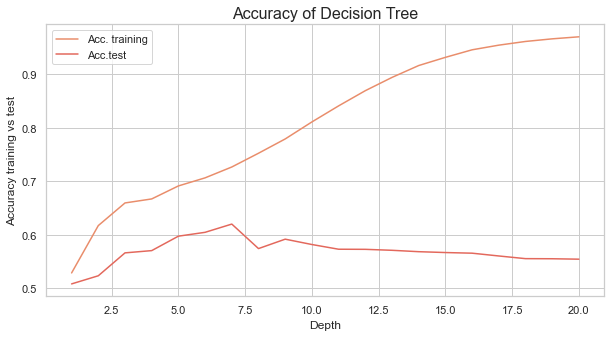

In [ ]:

fig, ax = plt.subplots(figsize = (10, 5))
colors_taratt = ['#761878', '#826fc9', '#b1c2f0' ]
sns.lineplot(x = 'depth', y = 'accuracy training', palette = colors_taratt, data = df_decisiontree);
sns.lineplot(x = 'depth', y = 'accuracy test', palette = colors_taratt, data = df_decisiontree);
ax.set_title(f'Accuracy of Decision Tree', size = 16)
ax.set(ylabel= f'Accuracy training vs test', xlabel = 'Depth');
ax.legend(['Acc. training', 'Acc.test'])

if savefigs: plt.savefig('figs/accuracydecisiontree.png', bbox_inches = 'tight')

# Convolutional Neural Network

In [28]:
import numpy as np

#pytorch imports
import torch
import torchvision
from torch.autograd import Variable
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.optim as optim
import torch.nn.functional as F

#torchmetrics imports 
from torchmetrics.functional import accuracy
from torchmetrics import F1Score

class CustomDataset(Dataset):
    '''
        Custom dataset class used for loading the data from the .npy file
        and preparing it before transforming it into a pytorch dataset
    '''
    def __init__(self, npy_file, transform=None):
        self.data = np.load(npy_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        #get the y label (target)
        target = self.data[idx, -1]

        #reshape the image to 28x28
        image = np.reshape(self.data[idx, :-1], (-1, 28))
       
        #create a dictionary with the image and the target
        sample = {'image': image, 'target': target} 

        if self.transform:
            sample['image'] = self.transform(sample['image'])

        return sample

class Net(nn.Module):
    '''
        A class that defines the CNN model, and is a subclass of nn.Module
    '''
    def __init__(self):
        super().__init__()
        #convolutional layers
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        #pooling layer (max pooling)
        self.pool = nn.MaxPool2d(2, 2)

        #fully connected layers
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = torch.flatten(x, 1) 

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

def to_pytorch_format(batch_size=4, norm_metric=1/255):
    '''
        A function that uses torchvision functions to transform the data into a pytorch dataset
        and then loads it into a dataloader. Also, it returns the classes of the dataset
    '''
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize(norm_metric, norm_metric),
        transforms.Grayscale(num_output_channels=1)])
        
    #create the train_loader and apply the above transformations
    train_set = CustomDataset(train_path, transform=transform)
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

    #create the test_loader and apply the above transformations
    test_set = CustomDataset(test_path, transform=transform)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

    #define the classes of the dataset
    classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Shirt']

    return train_loader, test_loader, classes

def train_cnn_model(model, train_loader, test_loader, epochs_num=10, testing=False, lr=0.001, momentum=0.9):
    '''
        A function that trains the CNN model using the training data
    '''
    #model.to(device)

    #define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

    l = list()
    for epoch in range(epochs_num):
        current_loss = 0.0 #to keep track of the model loss

        for i, data in enumerate(train_loader):
            #inputs, labels = Variable(data['image'].to(device)), Variable(data['target'].to(device))
            inputs, labels = Variable(data['image']), Variable(data['target'])
            
            # zero the parameter gradients
            optimizer.zero_grad()

            outputs = model(inputs)

            #compute loss and accuracy
            loss = criterion(outputs, labels)
            acc = accuracy(outputs,labels, task='multiclass', num_classes=5)

            # backpropagate
            loss.backward()

            # update weights
            optimizer.step()

            current_loss += loss.item()
            if testing and i % 2000 == 1999:   
                print(f'epoch: {epoch+1}, acc: {acc} loss: {current_loss / 2000:.3f}')
                l.append([epoch, acc.item(), current_loss / 2000])
                current_loss = 0.0
                

    if testing: print('Finished training')

    return pd.DataFrame(data= l, columns=['epoch','accuracy', 'loss'])

def validate_cnn_model(model):
    '''
        A function that validates the CNN model using the test data
    '''

    predictions , targets= [], [] #used to compute accuracy and f1 score

    # torch.no_grad() makes sure that we don't track the gradients as we are not training
    with torch.no_grad():
        for data in test_loader:
            images, labels = Variable(data['image']), Variable(data['target'])

            # calculate outputs by running images through the network
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)

            predictions.append(predicted)
            targets.append(labels)


    #turn predictions and targets into tensors
    predictions, targets = torch.cat(predictions), torch.cat(targets)
    acc = accuracy(predictions, targets, task='multiclass', num_classes=5) * 100
    f1 = F1Score(num_classes=5, average='macro', task='multiclass') 
    f1_score = f1(predictions, targets) * 100

    print(f'Test data accuracy: {acc:.2f}%, F1 score: {f1_score:.2f}%')

def get_confusion_matrix(model):
    '''
        A function that gets the predictions and targets to get confusion matrix.
    '''

    predictions , targets= [], [] #used to compute accuracy and f1 score

    # torch.no_grad() makes sure that we don't track the gradients as we are not training
    with torch.no_grad():
        for data in test_loader:
            images, labels = Variable(data['image']), Variable(data['target'])

            # calculate outputs by running images through the network
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)

            predictions.append(predicted)
            targets.append(labels)
     #turn predictions and targets into tensors
    predictions, targets = torch.cat(predictions), torch.cat(targets)
    predictions, targets = predictions.numpy(), targets.numpy()
    return predictions, targets

In [32]:
#device = torch.device('mps')
train_path, test_path = 'fashion_train.npy', 'fashion_test.npy'

#hyperparameters
EPOCHS_NUM = 10
BATCH_SIZE = 5
TESTING = True
LR = 0.001
MOMENTUM = 0.7

train_loader, test_loader, classes = to_pytorch_format(batch_size=BATCH_SIZE)
model = Net()

df = train_cnn_model(model, train_loader, test_loader, testing=TESTING, epochs_num=EPOCHS_NUM,
                    lr=LR, momentum=MOMENTUM)


epoch: 1, acc: 0.6000000238418579 loss: 0.592
epoch: 2, acc: 1.0 loss: 0.440
epoch: 3, acc: 0.800000011920929 loss: 0.387
epoch: 4, acc: 0.800000011920929 loss: 0.346
epoch: 5, acc: 1.0 loss: 0.320
epoch: 6, acc: 0.800000011920929 loss: 0.304
epoch: 7, acc: 1.0 loss: 0.284
epoch: 8, acc: 1.0 loss: 0.264
epoch: 9, acc: 0.800000011920929 loss: 0.254
epoch: 10, acc: 0.800000011920929 loss: 0.235
Finished training


In [33]:
validate_cnn_model(model)

Test data accuracy: 83.94%, F1 score: 83.89%


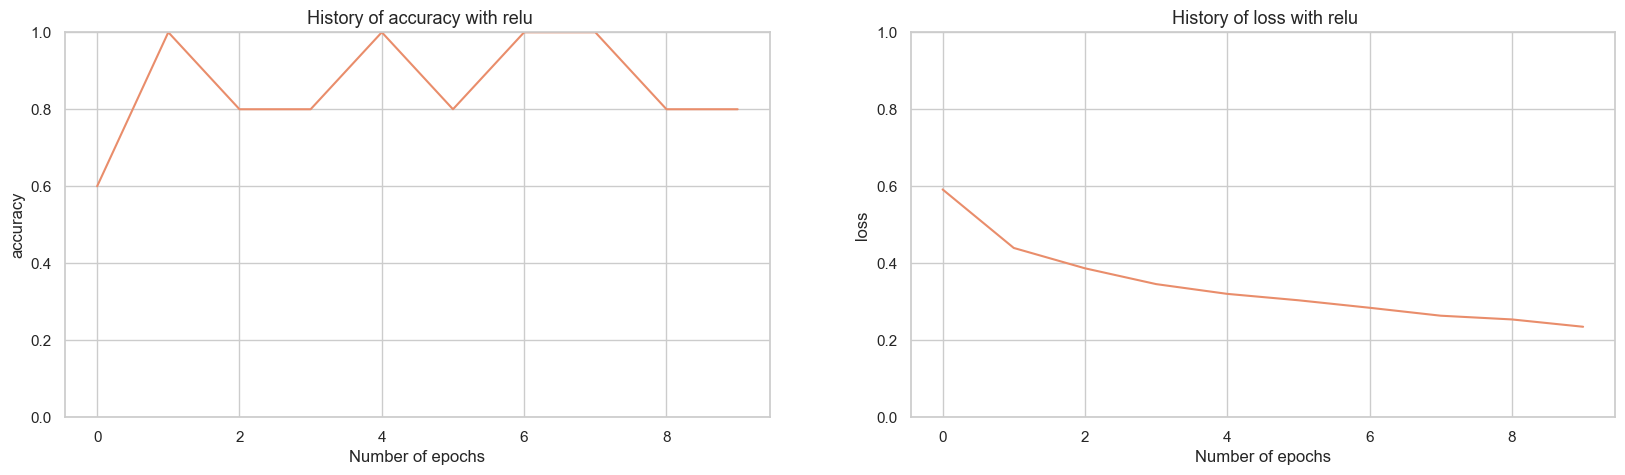

In [34]:
make_plots(df, ['accuracy','loss'], 'relu')

In [35]:
pred, true = get_confusion_matrix(model)

In [36]:
cf_matrix=confusion_matrix(true, pred)

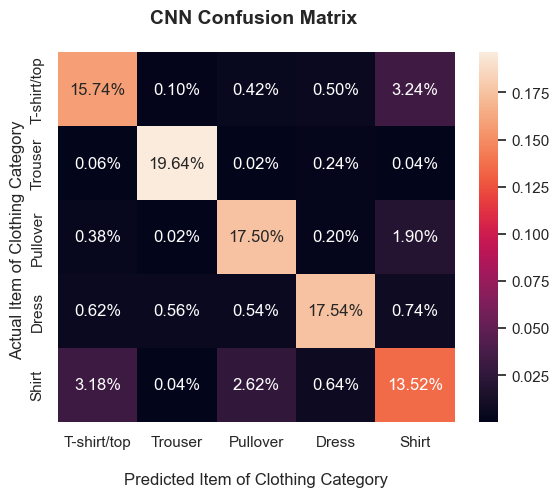

In [42]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

ax.set_title('CNN Confusion Matrix \n', fontweight ="bold", fontsize=14);
ax.set_xlabel('\nPredicted Item of Clothing Category')
ax.set_ylabel('Actual Item of Clothing Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(NAMES)
ax.yaxis.set_ticklabels(NAMES)

## Display the visualization of the Confusion Matrix.
plt.show()